In [2]:
import pandas as pd
import numpy as np
import os 
from datetime import date

from sklearn.preprocessing import LabelEncoder

import collections
import logging

In [3]:
#os.path.abspath(os.getcwd())

In [2]:
os.chdir('/Users/michelleyuu/Desktop/data245/project/')

In [3]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
test = pd.DataFrame({'step': [744,744], 'type': ['PAYMENT', 'CASH_OUT'], 'amount': [9000,89], 'nameOrig': ['C0000000000', '1234567891'], 'oldbalanceOrg': [9000, 1000],
'newbalanceOrig': [2000, np.nan], 'nameDest': ['C9999999999', '1212121212'], 'oldbalanceDest': [0, -1000], 'newbalanceDest': [9000, np.nan], 'isFraud': [1,1], 'isFlaggedFraud': [0,0]})

In [8]:
test2 = pd.DataFrame({ 'type': ['PAYMENT', 'CASHOUT'], 'amount': [9000,89], 'nameOrig': ['C0000000000', '1234567891'], 'oldbalanceOrg': [9000, 1000],
'newbalanceOrig': [2000, np.nan], 'nameDest': ['C9999999999', '1212121212'], 'oldbalanceDest': [0, -1000], 'newbalanceDest': [9000, np.nan], 'isFraud': [1,1], 'isFlaggedFraud': [0,0]})

In [9]:
test

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,744,PAYMENT,9000,C0000000000,9000,2000.0,C9999999999,0,9000.0,1,0
1,744,CASH_OUT,89,1234567891,1000,NaN,1212121212,-1000,NaN,1,0


In [10]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

C - customer
M - merchant
C to C (customer to customer)
C to M (customer to merchant)
M to C (merchant to customer)
M to M (merchant to merchant)

step = time in hours (744 = 30 days)
Type = Type of money delivery
nameOrig = Original bank user
oldbalanceOrg = previous bank balance
newbalanceOrg = current bank balance
nameDest = recipient of transaction
oldbalanceDest = previous bank balance
newbalanceDest = current bank balance

isFraud = try to empty out the balance
isFlaggedFraud = illegal attempt to transfer 200+

Target Feature = isFraud

In [11]:
#df['type'] = df['type'].astype(str)
#df['nameOrig'] = df['nameOrig'].astype(str)
#df['nameDest'] = df['nameDest'].astype(str)

In [12]:
x = "test2"

def logger_funct(x_): 
    logger = logging.getLogger(__name__)
    logger.setLevel(logging.INFO)

    today = date.today()
    todaydate = today.strftime('%d%m%Y')

    handler = logging.FileHandler("logfile{}".format(todaydate))
    handler.setLevel(logging.INFO)

    formatter = logging.Formatter("%(asctime)s - %(message)s")
    handler.setFormatter(formatter)

    logger.addHandler(handler)

    logger.info(x_)

In [12]:
Logger.logger_funct("test")

In [6]:
df['nameOrig'].astype('str')

0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameOrig, Length: 6362620, dtype: object

https://www.kite.com/python/docs/logging.FileHandler

In [13]:
def check_str(x_, y_):
    try:
        cs = "Check string function is being deployed"
        logger_funct(cs)
        for i in range(len(x_)):
            if (type(x_[y_][i]) != type(1)) == True:
                cs_ = "Value strings"
                print(cs_)
            else:
                cs_ = "invalid strings"
                print(cs_)
    except ValueError as e:
        logger_funct(e)  
    except TypeError as e:
        logger_funct(e)  

In [14]:
def check_valid_type(x_):
    valid_type = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
    try:
        if (x_.type.isin(valid_type)).all() == True:
            cvt_ = 'All Types are valid'
            logger_funct(cvt_)  
        else:
            cvt_ = "Type has a misspelling"
            logger_funct(cvt_)
            return x_[~x_.type.isin(valid_type)]
    except ValueError as e:
        logger_funct(e)  
    except TypeError as e:
        logger_funct(e)  

In [15]:
check_valid_type(df)

In [57]:

#Add in length check
#len(df['nameOrig'][0]) == 11

def account_check(x_, y_):
    valid_str = ['C', 'M']
    valid_tuple = tuple(valid_str)
    try:
        if (((x_[y_].str.startswith(valid_tuple)).all() == True)):
            ac_ = 'Account information for {} is properly named'.format(y_)
            logger_funct(ac_)
        else:
            ac_ = "{} is missing the correct information".format({y_})
            logger_funct(ac_)
            return x_[~x_[y_].str.startswith(valid_tuple)]
    except ValueError as e:
        logger_funct(e)  
    except TypeError as e:
        logger_funct(e)  

In [17]:
def check_positive(x_, y_):
    try:
        if((x_[y_] >= 0).all() == True):
            cp_ = 'All values for {} is nonnegative'.format(y_)
            logger_funct(cp_)  
        else:
            cp_ = 'There are values for {} that are not postive'.format(y_)
            logger_funct(cp_)
            return x_[(x_[y_] < 0) | (x_[y_].isnull())]
    except ValueError as e:
        logger_funct(e)  
    except TypeError as e:
        logger_funct(e)  

In [18]:
def orig_dest_diff(x_, y_, z_):
    try:
        if(x_[y_] != x_[z_]).all() == True:
            odd_ = "There contains no account names in {} that are the same as {}".format(y_, z_)
            logger_funct(odd_)
        else:
            odd_ = "There are name accounts that are the same"
            x_[~(x_[y_] != x_[z_])]
    except ValueError as e:
        logger_funct(e)  
    except TypeError as e:
        logger_funct(e)  

In [19]:
def prep_funct(data_, amt_, obo, nbo, obd, nbd, no_, nd_):

    #check_str(df, 'nameOrig')
    
    check_valid_type(data_)
    account_check(data_, no_)
    check_positive(data_, amt_)
    check_positive(data_, obo)
    check_positive(data_, nbo)
    check_positive(data_, obd)
    check_positive(data_, nbd)

    orig_dest_diff(data_, no_, nd_)

prep_funct(df, 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','nameOrig', 'nameDest')

In [20]:
def check_null(x_):
    """
    Checks the dataframe to see whether there are any missing values, 
    then removes the rows with missing values
    """
    if(x_.isnull().values.any()) == False:
        null_ = "No nulls"
        logger_funct(null_)
        return x_
    else:
        #Keep nulls?
        #Data Quality Report possibility
        #think about it - 1 transaction at a time
        null_ = "Dropping nulls"
        x_ = x_.dropna()
        logger_funct(null_)
        return x_

In [56]:
def type_convert(x_):
    """
    Convert columns that contain "string" into numeric by using an encoder
    """

    #training already tested, keep reverse mapping - CHECK

    valid_type = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
    encodertype = LabelEncoder()
    encodertype.fit(valid_type)

    encoderfunc = LabelEncoder()

    x_['transaction_type'] = encodertype.transform(x_['type'])
    x_['nameorig_enc'] = encoderfunc.fit_transform(x_['nameOrig'])
    x_['namedest_enc'] = encoderfunc.fit_transform(x_['nameDest'])

    x_ = x_.drop(columns = ['type', 'nameOrig', 'nameDest', 'step', 'isFlaggedFraud'], axis =1)

    x_ = x_.rename(columns = {'oldbalanceOrg': 'oldbalanceOrig'})

    convert_ = "Applying the converter"

    logger_funct(convert_)
    return x_

In [22]:
def balance_diff(x_):
    x_['balance_difference'] = round(x_['oldbalanceOrig'] - x_['newbalanceOrig'], 2).ne(x_['amount'])
    x_["balance_difference"] = x_["balance_difference"].astype(int)

    bd_= "Apply balance difference"

    logger_funct(bd_)
    return x_

In [23]:
def export_csv(x_):
    """
    Creates a datetime object for the current date (in which it was processed), 
    then converts the datetime object into a string. 
    Append the datetime string to the file name 
    and exports the PANDAs dataframe as a csv file.
    """

    #Take the date
    today = date.today()
    #Format the date
    todaydate = today.strftime('%d%m%Y')
    #Create file name
    filename = 'data_{}.csv'.format(todaydate)
    #export file as CSV

    ecsv_ = "Exporting as CSV"
    logger_funct(ecsv_)

    x_.to_csv(filename, index = False)

In [50]:
def funcs(x_):
    """
    Apply functions in a single instance
    """

    x = check_null(x_)
     
    x = type_convert(x)

    x = balance_diff(x)

    #x = x.drop(['type', 'nameOrig', 'nameDest', 'step', 'isFlaggedFraud'], axis =1)

    export_csv(x)

    return x

In [52]:
z =funcs(df)

In [8]:
class Logger():
    def logger_funct(x_): 
        logger = logging.getLogger(__name__)
        logger.setLevel(logging.INFO)

        today = date.today()
        todaydate = today.strftime('%d%m%Y')

        handler = logging.FileHandler("logfile{}".format(todaydate))
        handler.setLevel(logging.INFO)

        formatter = logging.Formatter("%(asctime)s - %(message)s")
        handler.setFormatter(formatter)

        logger.addHandler(handler)

        logger.info(x_)


In [22]:
class Str_checker():
    def check_str(x_, y_):
        x_[y_] = x_[y_].astype('str')
        try:
            cs = "Check string function is being deployed"
            Logger.logger_funct(cs)
            for i in range(len(x_)):
                if (type(x_[y_][i]) == type("str")) == True:
                    cs_ = "Value strings"
                    #Logger.logger_funct(cs)
                    #return True
                else:
                    cs_ = "invalid strings"
                    Logger.logger_funct(cs)
                    #return False
        except ValueError as e:
            Logger.logger_funct(e)  
        except TypeError as e:
            Logger.logger_funct(e)  

In [24]:
class Valid_checker():
    def check_valid_type(x_):
        valid_type = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
        try:
            if (x_.type.isin(valid_type)).all() == True:
                cvt_ = 'All Types are valid'
                Logger.logger_funct(cvt_)
                return True
            else:
                cvt_ = "Type has a misspelling"
                Logger.logger_funct(cvt_)
                return x_[~x_.type.isin(valid_type)]
        except ValueError as e:
            Logger.logger_funct(e)  
        except TypeError as e:
            Logger.logger_funct(e)  

In [26]:
class Account_checker():
    def account_check(x_, y_):
        valid_str = ['C', 'M']
        valid_tuple = tuple(valid_str)
        try:
            if (((x_[y_].str.startswith(valid_tuple)).all() == True)):
                ac_ = 'Account information for {} is properly named'.format(y_)
                Logger.logger_funct(ac_)
                return True
            else:
                ac_ = "{} is missing the correct information".format({y_})
                Logger.logger_funct(ac_)
                return x_[~x_[y_].str.startswith(valid_tuple)]
        except ValueError as e:
            Logger.logger_funct(e)  
        except TypeError as e:
            Logger.logger_funct(e)  

In [29]:
class Positive_checker():
    def check_positive(x_, y_):
        try:
            if((x_[y_] >= 0).all() == True):
                cp_ = 'All values for {} is nonnegative'.format(y_)
                Logger.logger_funct(cp_)
                return True 
            else:
                cp_ = 'There are values for {} that are not postive'.format(y_)
                Logger.logger_funct(cp_)
                return x_[(x_[y_] < 0) | (x_[y_].isnull())]
        except ValueError as e:
            Logger.logger_funct(e)  
        except TypeError as e:
            Logger.logger_funct(e)  

In [31]:
class Difference_name():
    def orig_dest_diff(x_, y_, z_):
        try:
            if(x_[y_] != x_[z_]).all() == True:
                odd_ = "There contains no account names in {} that are the same as {}".format(y_, z_)
                Logger.logger_funct(odd_)
                return True
            else:
                odd_ = "There are name accounts that are the same"
                Logger.logger_funct(odd_)
                return x_[~(x_[y_] != x_[z_])]
        except ValueError as e:
            Logger.logger_funct(e)  
        except TypeError as e:
            Logger.logger_funct(e)  

In [13]:
class Null_checker():
    def check_null(x_):
        """
        Checks the dataframe to see whether there are any missing values, 
        then removes the rows with missing values
        """
        if(x_.isnull().values.any()) == False:
            null_ = "No nulls"
            Logger.logger_funct(null_)
            return x_
        else:
            #Data Quality Report - TBA
            null_ = "Dropping nulls"
            x_ = x_.dropna()
            Logger.logger_funct(null_)
            return x_

In [14]:
class Convert_checker():
    def type_convert(x_):
        """
        Convert columns that contain "string" into numeric by using an encoder
        """

        #training already tested, keep reverse mapping - CHECK

        valid_type = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
        encodertype = LabelEncoder()
        encodertype.fit(valid_type)

        encoderfunc = LabelEncoder()

        x_['transaction_type'] = encodertype.transform(x_['type'])
        x_['nameorig_enc'] = encoderfunc.fit_transform(x_['nameOrig'])
        x_['namedest_enc'] = encoderfunc.fit_transform(x_['nameDest'])

        x_ = x_.drop(columns = ['type', 'nameOrig', 'nameDest', 'step', 'isFlaggedFraud'], axis =1)

        x_ = x_.rename(columns = {'oldbalanceOrg': 'oldbalanceOrig'})

        convert_ = "Applying the converter"

        Logger.logger_funct(convert_)
        return x_

In [15]:
class Balance_checker():
    def balance_diff(x_):
        x_['balance_difference'] = round(x_['oldbalanceOrig'] - x_['newbalanceOrig'], 2).ne(x_['amount'])
        x_["balance_difference"] = x_["balance_difference"].astype(int)

        bd_= "Apply balance difference"

        Logger.logger_funct(bd_)
        return x_

In [16]:
class Csv_check():
    def export_csv(x_):
        """
        Creates a datetime object for the current date (in which it was processed), 
        then converts the datetime object into a string. 
        Append the datetime string to the file name 
        and exports the PANDAs dataframe as a csv file.
        """

        #Take the date
        today = date.today()
        #Format the date
        todaydate = today.strftime('%d%m%Y')
        #Create file name
        filename = 'data_{}.csv'.format(todaydate)
        #export file as CSV

        ecsv_ = "Exporting as CSV"
        Logger.logger_funct(ecsv_)

        x_.to_csv(filename, index = False)

In [32]:
def prep_funct(data_, amt_, obo, nbo, obd, nbd, no_, nd_):

    #Str_checker.check_str(df, 'nameOrig')
    
    valid_func = Valid_checker.check_valid_type(data_)
    if valid_func == True:
        account_func = Account_checker.account_check(data_, no_)
        if account_func == True:
            amount_func = Positive_checker.check_positive(data_, amt_)
            obo_func = Positive_checker.check_positive(data_, obo)
            nbo_func = Positive_checker.check_positive(data_, nbo)
            obd_func = Positive_checker.check_positive(data_, obd)
            nbd_func = Positive_checker.check_positive(data_, nbd)
            pos_list = [amount_func, obo_func, nbo_func, obd_func, nbd_func]
        else:
            return False
            if all(pos_list) == True:
                diff_func = Difference_name.orig_dest_diff(data_, no_, nd_)
            else:
                return False
                if diff_func == True:
                    return True
                else:
                    return False
    else:
        return False
        print("Error occurred")

#prep_funct(df, 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','nameOrig', 'nameDest')

In [17]:
def funcs(x_):
    """
    Apply functions in a single instance
    """

    prep = prep_funct(x_, 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','nameOrig', 'nameDest')

    if prep == True:
        x = Null_checker.check_null(x_)
        
        x = Convert_checker.type_convert(x)

        x = Balance_checker.balance_diff(x)

        #Csv_check.export_csv(x)

        return x
    else:
        issue_ = "Data preparation function found an error"
        Logger.logger_funct(issue_)
        

In [18]:
z = funcs(df)

In [19]:
z

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,nameorig_enc,namedest_enc,balance_difference
0,9839.64,170136.00,160296.36,0.00,0.00,0,3,757869,1662094,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,3,2188998,1733924,0
2,181.00,181.00,0.00,0.00,0.00,1,4,1002156,439685,0
3,181.00,181.00,0.00,21182.00,0.00,1,1,5828262,391696,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,3,3445981,828919,0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1,5651847,505863,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,4,1737278,260949,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,533958,108224,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,4,2252932,319713,0


In [26]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


<AxesSubplot:>

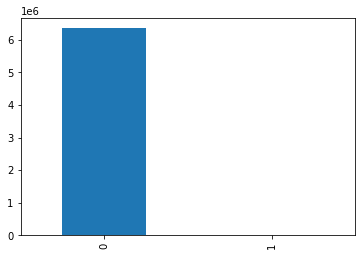

In [27]:
z['isFraud'].value_counts().plot(kind='bar')

In [29]:
fraud = z[z['isFraud'] == 1]
not_fraud = z[z['isFraud'] == 0]

In [30]:
not_fraud_sample = not_fraud.sample(random_state = 42, n = len(fraud)*3) #frac = .00388

In [31]:
df2 = fraud.append(not_fraud_sample, ignore_index=True)
df2

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,nameorig_enc,namedest_enc,balance_difference
0,181.00,181.0,0.00,0.00,0.00,1,4,1002156,439685,0
1,181.00,181.0,0.00,21182.00,0.00,1,1,5828262,391696,0
2,2806.00,2806.0,0.00,0.00,0.00,1,4,1379875,563886,0
3,2806.00,2806.0,0.00,26202.00,0.00,1,1,3619815,2134,0
4,20128.00,20128.0,0.00,0.00,0.00,1,4,1232211,251089,0
...,...,...,...,...,...,...,...,...,...,...
32847,1912.88,0.0,0.00,0.00,0.00,0,3,1175575,657725,1
32848,69219.09,0.0,0.00,800056.27,869275.36,0,1,4159,279824,1
32849,180205.95,11735.0,0.00,353795.05,565995.96,0,1,3177816,496506,1
32850,31.40,351.0,319.60,0.00,0.00,0,3,2188138,778529,0


In [32]:
X = df2.drop('isFraud', axis = 1)
Y = df2['isFraud']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
rus = RandomUnderSampler(random_state = 42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [54]:
c = pd.read_csv('data_01112021.csv')

In [55]:
c

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,nameorig_enc,namedest_enc,balance_difference
0,9839.64,170136.00,160296.36,0.00,0.00,0,3,757869,1662094,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,3,2188998,1733924,0
2,181.00,181.00,0.00,0.00,0.00,1,4,1002156,439685,0
3,181.00,181.00,0.00,21182.00,0.00,1,1,5828262,391696,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,3,3445981,828919,0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1,5651847,505863,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,4,1737278,260949,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,533958,108224,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,4,2252932,319713,0
